<a href="https://colab.research.google.com/github/harnalashok/hadoop/blob/main/spark_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 28th March 2023
# Myfolder: github/hadoop
# Objectives:
#             i)  Learn to perform regression using pyspark
# Ref: https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a


## Spark Reference API
a. [Quickstart](https://spark.apache.org/docs/latest/quick-start.html) <br>
b. Dataframe [APIs list](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/dataframe.html) at a glance<br>
c. Pandas [API](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/index.html) on spark <br>
c. ALso look at useful [this source code](https://spark.apache.org/docs/latest/api/python/_modules/pyspark/sql/functions.html) of functions that has examples<br>



## A. Full spark install
Installs `pyspark (spark-3.3.2-bin-hadoop3)`.<br>
Takes less than a minute to install

### 1.0 Libraries

In [1]:
# 1.0 How to set environment variable
import os  
import time  

### 2.0 Define some functions

#### ssh_install()

In [2]:
# 2.0 Function to install ssh client and sshd (Server)
def ssh_install():
  print("\n--1. Download and install ssh server----\n")
  ! sudo apt-get remove openssh-client openssh-server
  ! sudo apt install openssh-client openssh-server
  
  print("\n--2. Restart ssh server----\n")
  ! service ssh restart

#### Java install

In [3]:
# 3.0 Function to download and install java 8
def install_java():
  ! rm -rf /usr/java

  print("\n--Download and install Java 8----\n")
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null        # install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     # set environment variable

  !update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
  !update-alternatives --set javac /usr/lib/jvm/java-8-openjdk-amd64/bin/javac
  
  !mkdir -p /usr/java
  ! ln -s "/usr/lib/jvm/java-8-openjdk-amd64"  "/usr/java"
  ! mv "/usr/java/java-8-openjdk-amd64"  "/usr/java/latest"
  
  !java -version       #check java version
  !javac -version

#### setup ssh passphrase

In [4]:
# 6.0 Function tp setup ssh passphrase
def set_keys():
  print("\n---22. Generate SSH keys----\n")
  ! cd ~ ; pwd 
  ! cd ~ ; ssh-keygen -t rsa -P '' -f ~/.ssh/id_rsa
  ! cd ~ ; cat ~/.ssh/id_rsa.pub >> ~/.ssh/authorized_keys
  ! cd ~ ; chmod 0600 ~/.ssh/authorized_keys


#### Set environment

In [5]:
# 7.0 Function to set up environmental variables
def set_env():
  print("\n---23. Set Environment variables----\n")
  # 'export' command does not work in colab
  # https://stackoverflow.com/a/57240319
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre"   
  

#### function to install prerequisites
java and ssh<br>


In [6]:
# 8.0 Function to call all functions
def install_components():
  print("\n--Install java----\n")
  ssh_install()
  install_java()  
  #set_keys()
  set_env()


### 3.0 Install components
Start downloading, install and configure. Takes around 2 minutes<br>
Your <u>input *'y'* is required </u>at one place while overwriting earlier ssh keys

In [7]:
# 9.0 Start installation
start = time.time()
install_components()
end = time.time()
print("\n---Time taken----\n")
print((end- start)/60)


--Install java----


--1. Download and install ssh server----

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'openssh-server' is not installed, so not removed
The following packages were automatically installed and are no longer required:
  libboost-atomic-dev libboost-atomic1.71-dev libboost-atomic1.71.0
  libboost-chrono-dev libboost-chrono1.71-dev libboost-chrono1.71.0
  libboost-container-dev libboost-container1.71-dev libboost-container1.71.0
  libboost-context-dev libboost-context1.71-dev libboost-context1.71.0
  libboost-coroutine-dev libboost-coroutine1.71-dev libboost-coroutine1.71.0
  libboost-date-time-dev libboost-date-time1.71-dev libboost-date-time1.71.0
  libboost-exception-dev libboost-exception1.71-dev libboost-fiber-dev
  libboost-fiber1.71-dev libboost-fiber1.71.0 libboost-filesystem-dev
  libboost-filesystem1.71-dev libboost-filesystem1.71.0 libboost-graph-dev
  libboost-graph-parallel-dev libboost-graph-par

### 4.0 Define functions

`findspark`: PySpark isn't on `sys.path` by default, but that doesn't mean it can't be used as a regular library. You can address this by either symlinking pyspark into your site-packages, or adding `pyspark` to `sys.path` at runtime. `findspark` does the latter.

In [8]:
# 1.0 Function to download and unzip spark
def spark_koalas_install():
  print("\n--1.1 Install findspark----\n")
  !pip install -q findspark

  #print("\n--1.2 Install databricks Koalas----\n")
  #!pip install koalas
  
  # This download link NEEDS TO BE CHECKED AGAIN
  print("\n--1.3 Download Apache tar.gz----\n")
            
  ! wget -c https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz 

  print("\n--1.4 Transfer downloaded content and unzip tar.gz----\n")
  !  mv /content/spark*   /opt/
  ! tar -xzf /opt/spark-3.3.2-bin-hadoop3.tgz  --directory /opt/

  print("\n--1.5 Check folder for files----\n")
  ! ls -la /opt


In [9]:
# 1.1 Function to set environment
def set_spark_env():
  print("\n---2. Set Environment variables----\n")
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" 
  os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre" 
  os.environ["SPARK_HOME"] = "/opt/spark-3.3.2-bin-hadoop3" 
  os.environ["SPARK_CONF_DIR"] = "/opt/spark-3.3.2-bin-hadoop3/conf"     
  os.environ["LD_LIBRARY_PATH"] += ":/opt/spark-3.3.2-bin-hadoop3/lib/native"
  os.environ["PATH"] += ":/opt/spark-3.3.2-bin-hadoop3/bin:/opt/spark-3.3.2-bin-hadoop3/sbin"
  print("\n---2.1. Check Environment variables----\n")
  # Check
  ! echo $PATH
  ! echo $LD_LIBRARY_PATH

In [10]:
# 1.2 Function to configure spark 
def spark_conf():
  print("\n---3. Configure spark to access hadoop----\n")
  !mv /opt/spark-3.3.2-bin-hadoop3/conf/spark-env.sh.template  /opt/spark-3.3.2-bin-hadoop3/conf/spark-env.sh
  #!echo "HADOOP_CONF_DIR=/opt/hadoop-3.2.2/etc/hadoop/" >> /opt/spark-3.1.2-bin-hadoop3.2/conf/spark-env.sh
  print("\n---3.1 Check ----\n")
  #!cat /opt/spark-3.1.1-bin-hadoop3.2/conf/spark-env.sh

### 5.0 Install spark


In [11]:
# 2.0 Call all the three functions
def install_spark():
  spark_koalas_install()
  set_spark_env()
  spark_conf()


In [12]:
# 2.1 
install_spark()


--1.1 Install findspark----


--1.3 Download Apache tar.gz----

--2023-04-04 01:01:47--  https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M   187MB/s    in 1.5s    

2023-04-04 01:01:49 (187 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]


--1.4 Transfer downloaded content and unzip tar.gz----


--1.5 Check folder for files----

total 292368
drwxr-xr-x  1 root root      4096 Apr  4 01:01 .
drwxr-xr-x  1 root root      4096 Apr  4 00:59 ..
drwxr-xr-x  1 root root      4096 Mar 31 13:52 google
drwxr-xr-x  1 root root      4096 Mar 31 13:28 nvidia
drwxr-xr-x 13  501 1000      4096 Feb 10 20:40 spark-3.3.

## B. Call Essential libraries
We do not import `pandas` but `pyspark.pandas` as `ps`.

In [13]:
# 3.0 Just call some libraries to test
import numpy as np
import os
import time 

# 3.1 Get spark in sys.path
import findspark
findspark.init()

# 3.2 Call other spark libraries
#     Just to test
import pyspark.pandas as ps
from pyspark.sql import SparkSession

/opt/spark-3.3.2-bin-hadoop3/python/pyspark/pandas/__init__.py:49: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [14]:
# 3.3
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [15]:
# 3.4 Increase cell width to display wide columnar output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## C. Build spark session
You can modify spark driver/executor memory here<br>
SparkSession name is `spark`<br>


### Modifying spark configuraion
Increase driver and executor memory

In [16]:
# 4.0 Check template file
! cat /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf.template

#
# Licensed to the Apache Software Foundation (ASF) under one or more
# contributor license agreements.  See the NOTICE file distributed with
# this work for additional information regarding copyright ownership.
# The ASF licenses this file to You under the Apache License, Version 2.0
# (the "License"); you may not use this file except in compliance with
# the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Default system properties included when running spark-submit.
# This is useful for setting default environmental settings.

# Example:
# spark.master                     spark://master:7077
# spark.eventLog.enable

In [17]:
# 4.1 Create spark-defaults.conf 
! cp /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf.template  /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf


In [18]:
# 4.2 Amend properties
! echo "spark.driver.memory 6g" >> /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf
! echo "spark.executor.memory 3g" >> /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf

In [19]:
# 4.3 Check now
! cat /opt/spark-3.3.2-bin-hadoop3/conf/spark-defaults.conf

#
# Licensed to the Apache Software Foundation (ASF) under one or more
# contributor license agreements.  See the NOTICE file distributed with
# this work for additional information regarding copyright ownership.
# The ASF licenses this file to You under the Apache License, Version 2.0
# (the "License"); you may not use this file except in compliance with
# the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Default system properties included when running spark-submit.
# This is useful for setting default environmental settings.

# Example:
# spark.master                     spark://master:7077
# spark.eventLog.enable

### Stop and start SparkSession

In [20]:
# 5.0 Build spark session:
# Stop spark, if started
#spark.stop()
# 5.1 Now start spark
spark = SparkSession. \
                    builder. \
                    master("local[*]"). \
                    appName("myexpt"). \
                    getOrCreate()

In [21]:
sc = spark.sparkContext
spark.sparkContext.getConf().getAll()

[('spark.driver.extraJavaOptions',
  '-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED'),
 ('spark.executor.memory', '3g'),
 ('spark.app.name', 'myexpt'),
 ('spark.driver.port', '37455'),
 ('spark.executor.id', 'driver'),
 ('spark.app.submitTime', '1680570147794'),
 ('spark.app.id', 'local-1680570150167'),
 ('spark.driver

In [22]:
# 5.2
print(spark.sparkContext._conf.getAll())

[('spark.driver.extraJavaOptions', '-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED'), ('spark.executor.memory', '3g'), ('spark.app.name', 'myexpt'), ('spark.driver.port', '37455'), ('spark.executor.id', 'driver'), ('spark.app.submitTime', '1680570147794'), ('spark.app.id', 'local-1680570150167'), ('spark.driver.memory',

## D. Mount gdrive

In [23]:
# 1.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Read Data
Read and explore data

In [93]:
# 1.1 List path to folder containg csv file. 
#      Note '/' at the end:

pathToFolder = "/gdrive/MyDrive/Colab_data_files/bankmarketing/"

A label indexer that maps a string column of labels to an ML column of label indices. If the input column is numeric, we cast it to string and index the string values. The indices are in [0, numLabels). By default, this is ordered by label frequencies so the most frequent label gets index 0. 

In [94]:
# 1.2 Read data:
df = ps.read_csv(
                 pathToFolder + "bank-full.csv",
                 sep= ";"
                 )


/opt/spark-3.3.2-bin-hadoop3/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [95]:
# 2.0 Explore data:
df.shape

print("\n=====\n")

df.head()


(45211, 17)


=====



,age,job,marital,education,hascreditindefault,avgyearlybalance,hashousingloan,haspersonalloan,contactCommType,lastContactdayOfMonth,lastContactmonthOfYear,contactDuration,noOfContactsPerformedDuringcampaign,pdays,noOfContprevious_tocampaign,outcomeOfPreMarketingcampaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [96]:
# 2.3 Check nulls:
df.isnull().sum()

age                                    0
job                                    0
marital                                0
education                              0
hascreditindefault                     0
avgyearlybalance                       0
hashousingloan                         0
haspersonalloan                        0
contactCommType                        0
lastContactdayOfMonth                  0
lastContactmonthOfYear                 0
contactDuration                        0
noOfContactsPerformedDuringcampaign    0
pdays                                  0
noOfContprevious_tocampaign            0
outcomeOfPreMarketingcampaign          0
y                                      0
dtype: int64

In [97]:
df.dtypes

age                                     int32
job                                    object
marital                                object
education                              object
hascreditindefault                     object
avgyearlybalance                        int32
hashousingloan                         object
haspersonalloan                        object
contactCommType                        object
lastContactdayOfMonth                   int32
lastContactmonthOfYear                 object
contactDuration                         int32
noOfContactsPerformedDuringcampaign     int32
pdays                                   int32
noOfContprevious_tocampaign             int32
outcomeOfPreMarketingcampaign          object
y                                      object
dtype: object

In [98]:
catCols = df.select_dtypes(include = ['object']).columns
catCols = catCols.to_list()

In [99]:
numCols = df.select_dtypes(include = ['int32']).columns
numCols = numCols.to_list()

In [100]:
df[numCols].head()

,age,avgyearlybalance,lastContactdayOfMonth,contactDuration,noOfContactsPerformedDuringcampaign,pdays,noOfContprevious_tocampaign
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [101]:
len(np.unique(df['noOfContactsPerformedDuringcampaign'].to_numpy()))

print("\n===========\n")

len(np.unique(df['pdays'].to_numpy()))



/opt/spark-3.3.2-bin-hadoop3/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


48

/opt/spark-3.3.2-bin-hadoop3/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


559

## About Label encoding and StringIndexer
Reference [here](https://spark.apache.org/docs/latest/ml-features.html#stringindexer)

StringIndexer encodes a string column of labels to a column of label indices. StringIndexer can encode multiple columns. The indices are in [0, numLabels), and four ordering options are supported: “frequencyDesc”: descending order by label frequency (most frequent label assigned 0), “frequencyAsc”: ascending order by label frequency (least frequent label assigned 0), “alphabetDesc”: descending alphabetical order, and “alphabetAsc”: ascending alphabetical order (default = “frequencyDesc”). Note that in case of equal frequency when under “frequencyDesc”/”frequencyAsc”, the strings are further sorted by alphabet.

The unseen labels will be put at index numLabels if user chooses to keep them. If the input column is numeric, we cast it to string and index the string values. When downstream pipeline components such as Estimator or Transformer make use of this string-indexed label, you must set the input column of the component to this string-indexed column name. In many cases, you can set the input column with setInputCol.

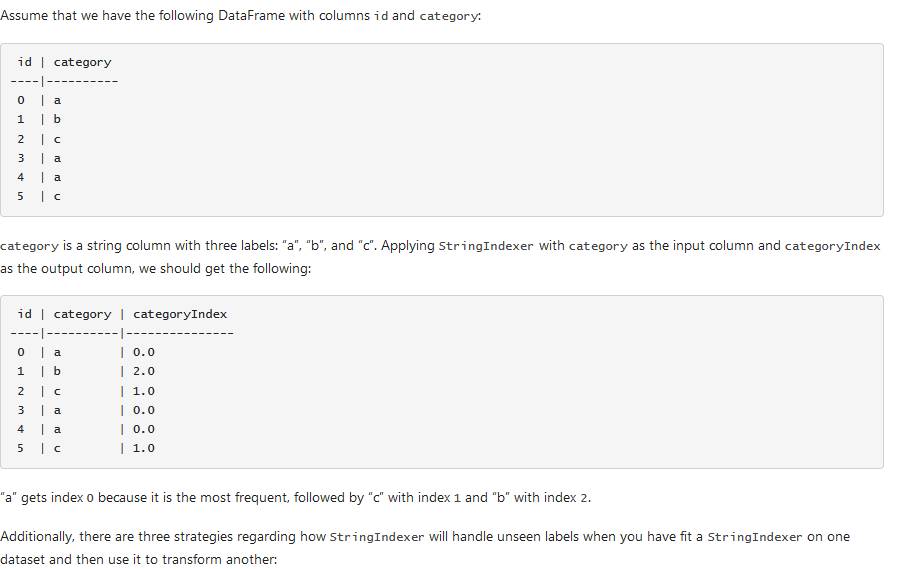

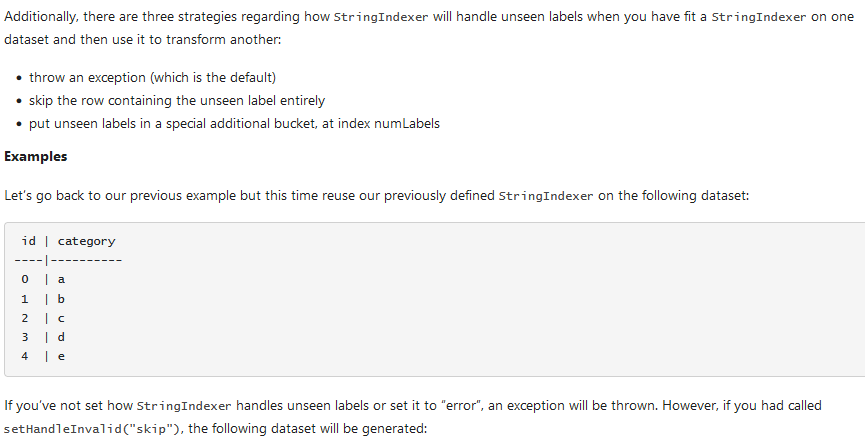

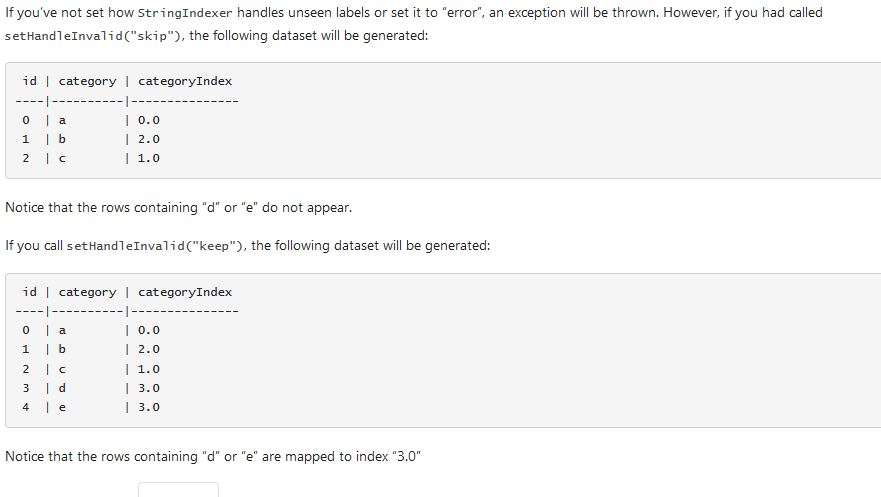

## StringIndex data now
StrinIndexing is same as LabelEncoding

In [102]:
# 3.0 
from pyspark.ml.feature import StringIndexer

In [103]:
# 3.1 Transform pyspark pandas DataFrame to 
#      SparkSQL DataFrame:

df = df.to_spark()
df.show(3)

+---+------------+-------+---------+------------------+----------------+--------------+---------------+---------------+---------------------+----------------------+---------------+-----------------------------------+-----+---------------------------+-----------------------------+---+
|age|         job|marital|education|hascreditindefault|avgyearlybalance|hashousingloan|haspersonalloan|contactCommType|lastContactdayOfMonth|lastContactmonthOfYear|contactDuration|noOfContactsPerformedDuringcampaign|pdays|noOfContprevious_tocampaign|outcomeOfPreMarketingcampaign|  y|
+---+------------+-------+---------+------------------+----------------+--------------+---------------+---------------+---------------------+----------------------+---------------+-----------------------------------+-----+---------------------------+-----------------------------+---+
| 58|  management|married| tertiary|                no|            2143|           yes|             no|        unknown|                    5|    

/opt/spark-3.3.2-bin-hadoop3/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [104]:
outCols = [i + "_index" for i in list(catCols)[:-1]]  # Exclude y
outCols
oheCols = [i + "_vec" for i in list(catCols)[:-1]]
oheCols


['job_index',
 'marital_index',
 'education_index',
 'hascreditindefault_index',
 'hashousingloan_index',
 'haspersonalloan_index',
 'contactCommType_index',
 'lastContactmonthOfYear_index',
 'outcomeOfPreMarketingcampaign_index']

['job_vec',
 'marital_vec',
 'education_vec',
 'hascreditindefault_vec',
 'hashousingloan_vec',
 'haspersonalloan_vec',
 'contactCommType_vec',
 'lastContactmonthOfYear_vec',
 'outcomeOfPreMarketingcampaign_vec']

In [105]:
# 3.2 Instantiate StringIndexer for multiple columns:

indexer = StringIndexer(
                        inputCols=catCols[:-1],   # Exclude y
                        outputCols=outCols
                        )



In [106]:
# 3.3 Fit and transform df:

df = indexer.fit(df).transform(df)
df.show(3)

+---+------------+-------+---------+------------------+----------------+--------------+---------------+---------------+---------------------+----------------------+---------------+-----------------------------------+-----+---------------------------+-----------------------------+---+---------+-------------+---------------+------------------------+--------------------+---------------------+---------------------+----------------------------+-----------------------------------+
|age|         job|marital|education|hascreditindefault|avgyearlybalance|hashousingloan|haspersonalloan|contactCommType|lastContactdayOfMonth|lastContactmonthOfYear|contactDuration|noOfContactsPerformedDuringcampaign|pdays|noOfContprevious_tocampaign|outcomeOfPreMarketingcampaign|  y|job_index|marital_index|education_index|hascreditindefault_index|hashousingloan_index|haspersonalloan_index|contactCommType_index|lastContactmonthOfYear_index|outcomeOfPreMarketingcampaign_index|
+---+------------+-------+---------+----

## About OneHotEncoder
See [here](https://spark.apache.org/docs/latest/ml-features.html#onehotencoder)

One-hot encoding maps a categorical feature, represented as a label index, to a binary vector with at most a single one-value indicating the presence of a specific feature value from among the set of all feature values. This encoding allows algorithms which expect continuous features, such as Logistic Regression, to use categorical features. For string type input data, it is common to encode categorical features using StringIndexer first.

OneHotEncoder can transform multiple columns, returning an one-hot-encoded output vector column for each input column. It is common to merge these vectors into a single feature vector using VectorAssembler.

OneHotEncoder supports the handleInvalid parameter to choose how to handle invalid input during transforming data. Available options include ‘keep’ (any invalid inputs are assigned to an extra categorical index) and ‘error’ (throw an error).

## OHE data now

In [107]:
# 4.0 Call OHE library:

from pyspark.ml.feature import OneHotEncoder


In [108]:
# 4.1 Instantiate OneHotEncoder
#      for multiple columns:

encoder = OneHotEncoder(inputCols=outCols,
                        outputCols=oheCols)


In [109]:
# 4.2 Fit the encoder:

model = encoder.fit(df)

In [110]:
# 4.3 And transform df:

df = model.transform(df)

# 4.3.1 Note two new vector columns:
df.show(3)

+---+------------+-------+---------+------------------+----------------+--------------+---------------+---------------+---------------------+----------------------+---------------+-----------------------------------+-----+---------------------------+-----------------------------+---+---------+-------------+---------------+------------------------+--------------------+---------------------+---------------------+----------------------------+-----------------------------------+--------------+-------------+-------------+----------------------+------------------+-------------------+-------------------+--------------------------+---------------------------------+
|age|         job|marital|education|hascreditindefault|avgyearlybalance|hashousingloan|haspersonalloan|contactCommType|lastContactdayOfMonth|lastContactmonthOfYear|contactDuration|noOfContactsPerformedDuringcampaign|pdays|noOfContprevious_tocampaign|outcomeOfPreMarketingcampaign|  y|job_index|marital_index|education_index|hascrediti

## What is VectorAssembler?

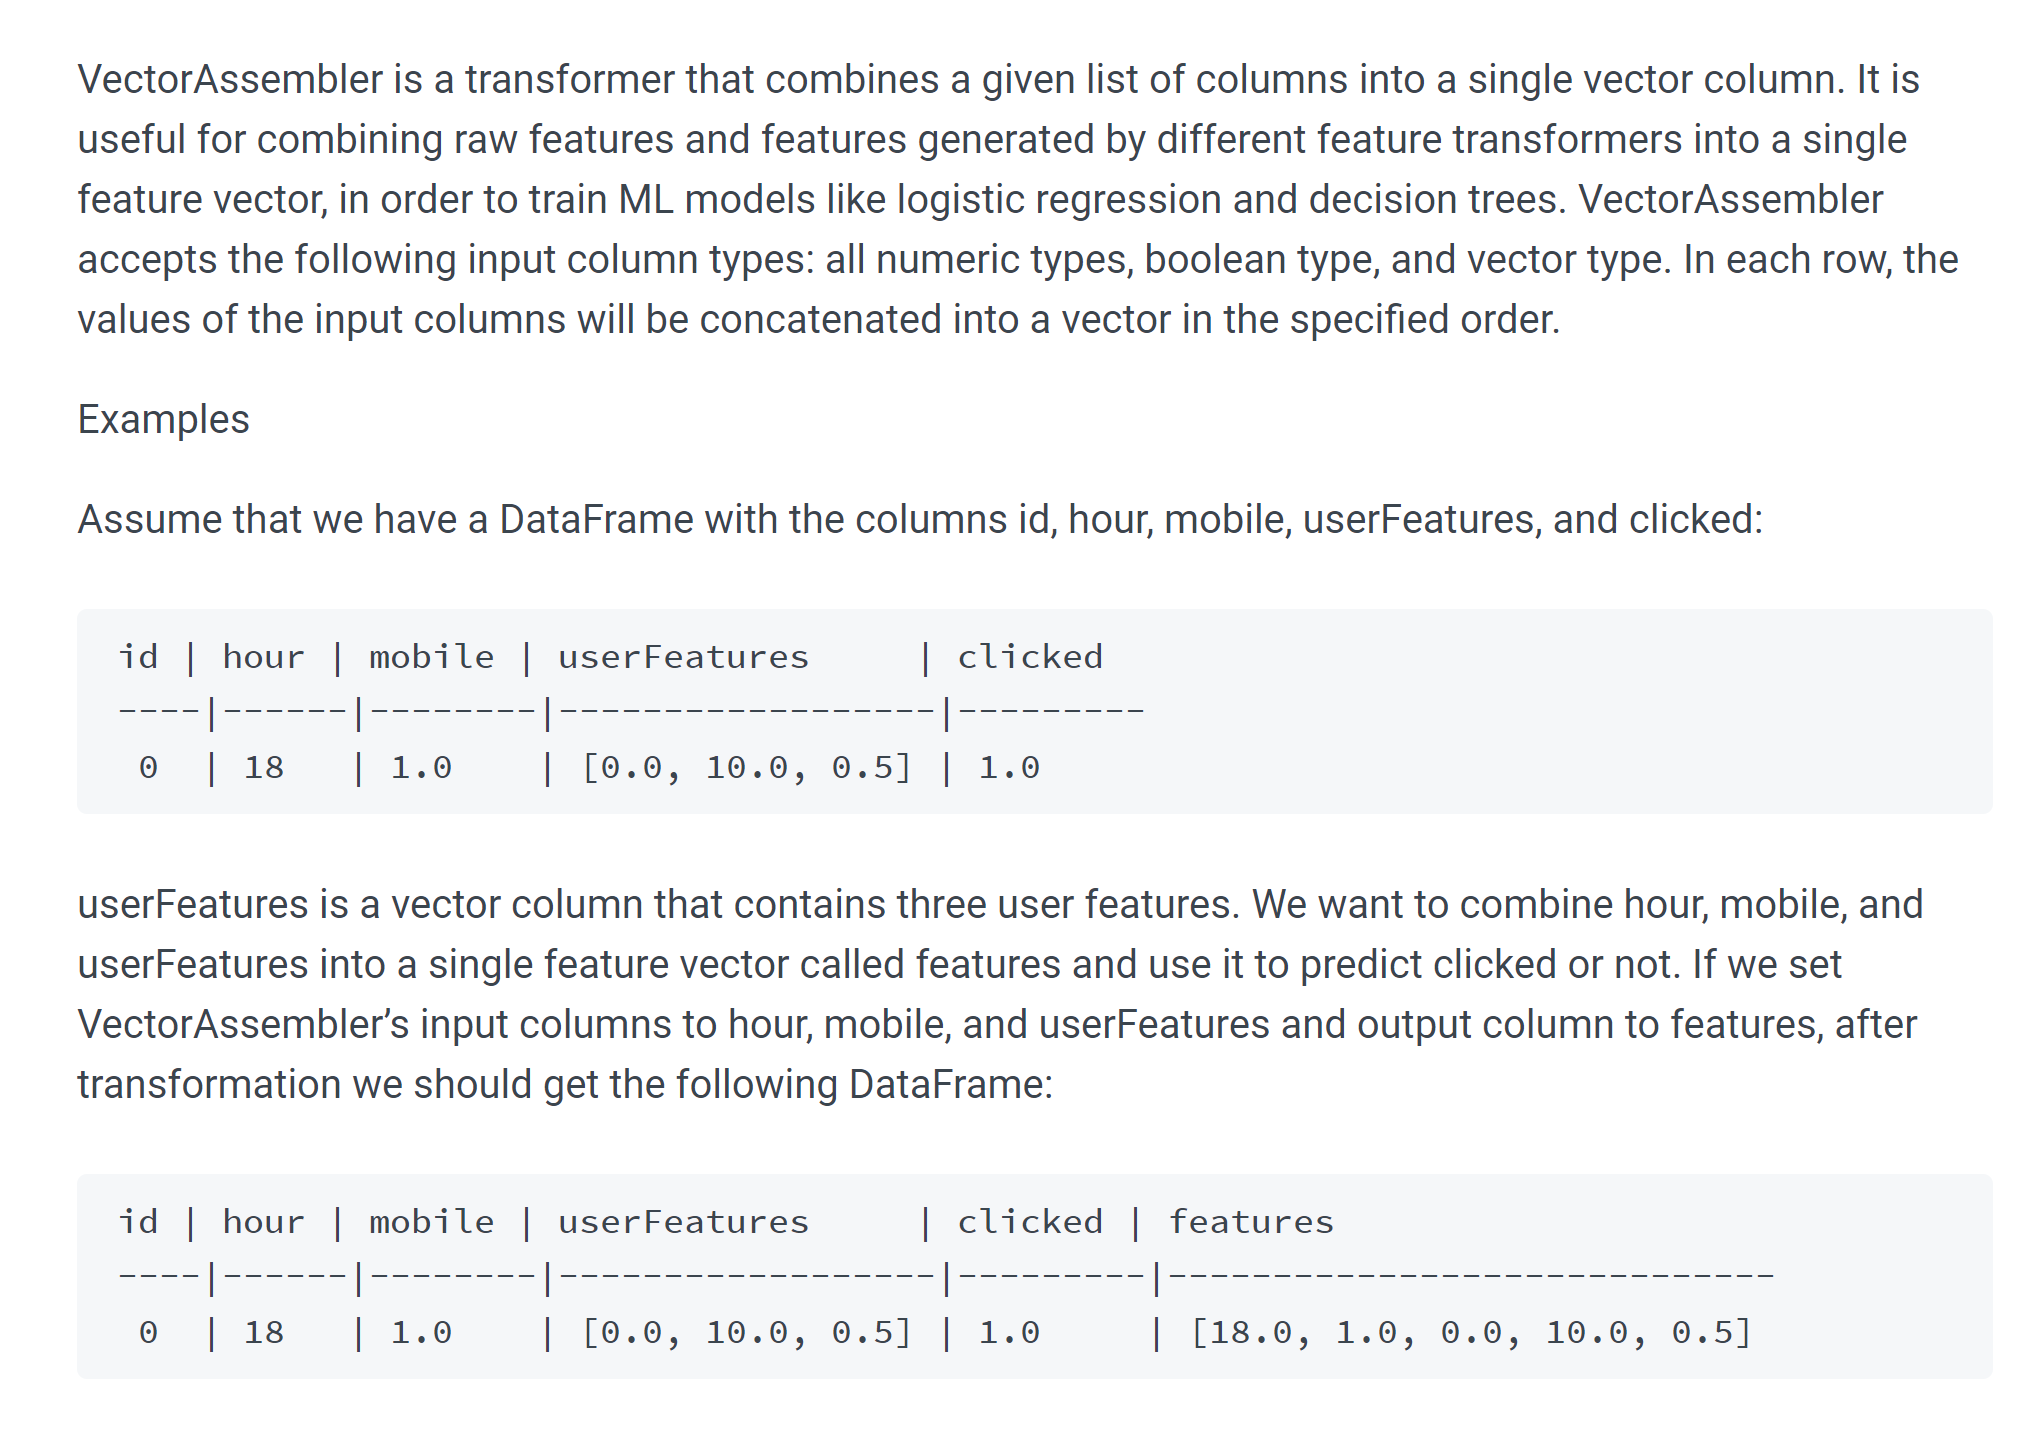

### Interprerting vectors

We start with the following columns:

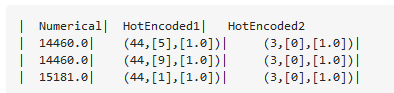

The first column is a numerical column and the other two columns represent the transformed data set for `OneHotEncoded` categorical features. After applying `VectorAssembler()`, the output becomes: 

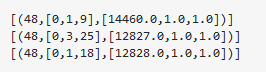

This output is not specific to `VectorAssembler`. It is just a string representation of `SparseVector` with the leading number representing the length of a vector, the first first set of numbers in brackets is a list of non-zero indices, the second set of numbers in brackets is a list of values corresponding to the indices

So `(48,[0,1,9],[14460.0,1.0,1.0])` represents a vector of length 48, with three non-zero entries:

>14460.0 at the 0th position<br>
>1.0 at the 1st position<br>
>1.0 at the 9th position


## Vector Assemble data now
Vectorassemble numeric and _vec columns 

In [111]:
# 5.0 Import VectorAssembler:
from pyspark.ml.feature import VectorAssembler

In [ ]:
# 5.0.1 Let us see columns once again:
df.columns

In [ ]:
# 5.0.2 Which all cols to assemble:

colsToAssemble= oheCols.copy()
colsToAssemble.extend(numCols)
colsToAssemble

In [115]:
# 5.1 Instantiate VectorAssembler:
                 
vectorAssembler = VectorAssembler(
                                   inputCols = colsToAssemble ,
                                   outputCol = 'features'
                                  )

In [116]:
# 5.2 Transform df.
#     Note that THERE IS NO fitting:

df = vectorAssembler.transform(df)



In [117]:
# 5.2.1 A column 'features' gets added:
df.show(3, truncate = False)

+---+------------+-------+---------+------------------+----------------+--------------+---------------+---------------+---------------------+----------------------+---------------+-----------------------------------+-----+---------------------------+-----------------------------+---+---------+-------------+---------------+------------------------+--------------------+---------------------+---------------------+----------------------------+-----------------------------------+--------------+-------------+-------------+----------------------+------------------+-------------------+-------------------+--------------------------+---------------------------------+-----------------------------------------------------------------------------------------------------------------------+
|age|job         |marital|education|hascreditindefault|avgyearlybalance|hashousingloan|haspersonalloan|contactCommType|lastContactdayOfMonth|lastContactmonthOfYear|contactDuration|noOfContactsPerformedDuringcampaig

In [ ]:
# 5.2.2 Check dtypes:
#       Note the dtype of 'features' column:

df.dtypes

## Transform target (y) now

In [121]:
# 6.0
yindex = StringIndexer(inputCol = 'y',
                       outputCol = 'y_index')

# 6.1
df = yindex.fit(df).transform(df)

# 6.2 
df.show(2)

## train/test split

In [126]:
# 6.0 Rename the target column, 'annualIncome' to label:
df = df.withColumnRenamed( "y_index", "label")

# 6.0.1
print(df.columns)

['age', 'job', 'marital', 'education', 'hascreditindefault', 'avgyearlybalance', 'hashousingloan', 'haspersonalloan', 'contactCommType', 'lastContactdayOfMonth', 'lastContactmonthOfYear', 'contactDuration', 'noOfContactsPerformedDuringcampaign', 'pdays', 'noOfContprevious_tocampaign', 'outcomeOfPreMarketingcampaign', 'y', 'job_index', 'marital_index', 'education_index', 'hascreditindefault_index', 'hashousingloan_index', 'haspersonalloan_index', 'contactCommType_index', 'lastContactmonthOfYear_index', 'outcomeOfPreMarketingcampaign_index', 'job_vec', 'marital_vec', 'education_vec', 'hascreditindefault_vec', 'hashousingloan_vec', 'haspersonalloan_vec', 'contactCommType_vec', 'lastContactmonthOfYear_vec', 'outcomeOfPreMarketingcampaign_vec', 'features', 'label']


In [127]:
# 6.1 Split spark_df into train/test:

splits = df.randomSplit([0.7, 0.3])
type(splits)   # list


list

In [128]:
# 6.2
train_df = splits[0]
test_df = splits[1]

In [129]:
# 6.3
train_df.show(3)
print("\n==========\n")
train_df.count()
print("\n==========\n")
test_df.count()

+---+-------+-------+---------+------------------+----------------+--------------+---------------+---------------+---------------------+----------------------+---------------+-----------------------------------+-----+---------------------------+-----------------------------+---+---------+-------------+---------------+------------------------+--------------------+---------------------+---------------------+----------------------------+-----------------------------------+---------------+-------------+-------------+----------------------+------------------+-------------------+-------------------+--------------------------+---------------------------------+--------------------+-----+
|age|    job|marital|education|hascreditindefault|avgyearlybalance|hashousingloan|haspersonalloan|contactCommType|lastContactdayOfMonth|lastContactmonthOfYear|contactDuration|noOfContactsPerformedDuringcampaign|pdays|noOfContprevious_tocampaign|outcomeOfPreMarketingcampaign|  y|job_index|marital_index|educatio

31599

13612

## Classification
For MLlib(DataFrame) based, see [here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html#pyspark.ml.classification.RandomForestClassifier)

In [131]:
from pyspark.ml.classification import RandomForestClassifier

In [133]:
rf = RandomForestClassifier(numTrees=100)

In [134]:
model = rf.fit(train_df)

In [138]:
model.summary.areaUnderROC   # 0.89372476

print("\n============\n")

model.summary.accuracy       # 0.88439507


0.8937247677054334

0.8843950757935378

In [139]:
test_df = model.transform(test_df)

In [142]:
# rawPrediction column is same as probbaility column:

test_df.show(3, truncate = False)

+---+-------+-------+---------+------------------+----------------+--------------+---------------+---------------+---------------------+----------------------+---------------+-----------------------------------+-----+---------------------------+-----------------------------+---+---------+-------------+---------------+------------------------+--------------------+---------------------+---------------------+----------------------------+-----------------------------------+---------------+-------------+-------------+----------------------+------------------+-------------------+-------------------+--------------------------+---------------------------------+-----------------------------------------------------------------------------------------------------------------------+-----+--------------------------------------+----------------------------------------+----------+
|age|job    |marital|education|hascreditindefault|avgyearlybalance|hashousingloan|haspersonalloan|contactCommType|lastCon

## Evaluation
See [here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.BinaryClassificationEvaluator.html#pyspark.ml.evaluation.BinaryClassificationEvaluator)<br>
Evaluator for binary classification, expects input columns rawPrediction, label and an optional weight column. The rawPrediction column can be of type double (binary 0/1 prediction, or probability of label 1) or of type vector (length-2 vector of raw predictions, scores, or label probabilities).

In [141]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

## Linear Regression

The learning objective is to minimize the specified loss function, with regularization. This supports two kinds of loss:

>squaredError (a.k.a squared loss)<br>

>huber (a hybrid of squared error for relatively small errors and absolute error for relatively large ones, and we estimate the scale parameter from training data)

This supports multiple types of regularization:

>none (a.k.a. ordinary least squares)<br>
>L2 (ridge regression)<br>
>L1 (Lasso)<br>
>L2 + L1 (elastic net)<br>


Elastic net includes both L1 and L2 regularisation as special instances when set properly. For example, a Lasso model is created by training a linear regression model with the elastic net parameter α set to 1. If α set to 0, on the other hand, the trained model is reduced to a ridge regression model. (Refer [here](https://www.edureka.co/community/170787/how-can-import-elastic-net-lasso-and-ridge-regression-pyspark))<br>

Where:

elasticNetParam is equivalent to α and regParam is equivalent to λ.

In [ ]:
# 6.0 Import LinearRegression library:
from pyspark.ml.regression import LinearRegression

In [ ]:
# 6.3 Linear Regression coefficinets
str(lr_model.coefficients)
print("\n---------\n")
str(lr_model.intercept)

'[14.220316455953915,33.89948770248696,1056.82971802819,2383.3633021265655,-374.0152713399049,-7997.097615071705,-4649.179384189036,-8520.998179245978,-6569.409420267956,-8475.703337147701,-4140.979212552063,-5089.815047576629,-6940.439770942137,-8660.27331025183]'


---------



'103124.1261044718'

In [ ]:
# 6.4
trainingSummary = lr_model.summary
# RMSE?
trainingSummary.rootMeanSquaredError
print("\n---------\n")
# R2 ?
trainingSummary.r2


44766.84556112754


---------



0.022143507304166143

In [ ]:
# 7.0 Make predictions:
lr_predictions = lr_model.transform(test_df)

In [ ]:
# 7.1 Observe predictions
lr_predictions.select("prediction","label","features").show(5)

+------------------+------+--------------------+
|        prediction| label|            features|
+------------------+------+--------------------+
|102368.78882487194| 22000|(14,[1,2,3,4,5],[...|
|114295.83262455862|143910|(14,[1,2,3,4,12],...|
|117326.74624139917|111424|(14,[0,1,2,3,4,7]...|
|116383.55968014583|138656|(14,[0,1,2,3,4],[...|
|119053.47363736406|161212|(14,[0,1,2,3,4,5]...|
+------------------+------+--------------------+
only showing top 5 rows



In [ ]:
# 7.2 Evaluate using test data:
from pyspark.ml.evaluation import RegressionEvaluator

R2 is very low. May be we should try non-linearregression using RandomForest or othe ML techniques.

In [ ]:
# &.3
lr_evaluator = RegressionEvaluator(
                                    predictionCol="prediction", \
                                    labelCol="label",
                                    metricName="r2"
                                    )

# 7.3.1 R2 is very low. 
lr_evaluator.evaluate(lr_predictions)

0.0007174510707147475

In [ ]:
# 7.4
test_result = lr_model.evaluate(test_df)
print("RMSE on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 46682.6


In [ ]:
# 7.5 Residuals
trainingSummary.residuals.show()

+-------------------+
|          residuals|
+-------------------+
| -63043.73909138997|
| -51103.98068857494|
| -40031.97051532951|
| -43448.19984487438|
|-25391.658233982278|
| -6042.919313044185|
| 5452.2453495635855|
|-1873.9597932282777|
|  8438.193275077065|
| 13094.653890318878|
|  40064.57710585806|
|  36977.39910719983|
| 30033.676505971453|
| 29402.975439116708|
| -92218.47571042378|
| -48171.13040793249|
|-31184.722945510774|
|-11833.107285322083|
| -6353.254001069392|
|   3108.51247180684|
+-------------------+
only showing top 20 rows



In [ ]:
############### Done #################